# Principal Component Analysis (PCA) are used to project high-dimensional latent spaces into 2D or 3D for visualization


# from
https://www.geeksforgeeks.org/what-is-latent-space-in-deep-learning/

### PCA
Helps in understanding the principal components and overall variance in the latent space.

In this section, we are going to visualize latent space using PCA by following these steps:

* Data Preprocessing: We normalize the MNIST dataset and flatten the images for the autoencoder.

* Autoencoder Architecture: The autoencoder consists of an encoder that compresses the data into a latent space and a decoder that reconstructs the original data from the latent space.

* Training: We train the autoencoder on the MNIST dataset, which helps the model learn meaningful representations in the latent space.

* Dimensionality Reduction: We use PCA to reduce the latent space dimensions to 2D for visualization. Alternatively, you can use t-SNE for potentially better visual separation.

* Plotting: We use Matplotlib to create scatter plots of the latent space representations, providing a visual understanding of how the model organizes the data.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.3852 - val_loss: 0.1855
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.1768 - val_loss: 0.1524
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1482 - val_loss: 0.1328
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.1307 - val_loss: 0.1207
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.1195 - val_loss: 0.1123
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.1120 - val_loss: 0.1067
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1067 - val_loss: 0.1025
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1029 - val_loss: 0.0994
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0999 - val_loss: 0.0972
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0980 - val_loss: 0.0959
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0970 - val_loss

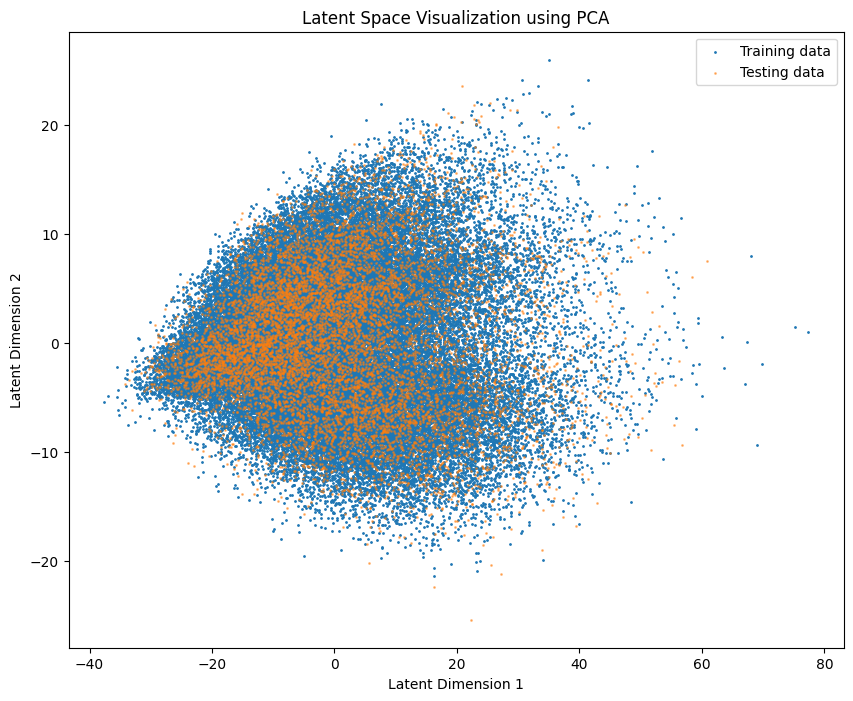

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist

# Load and preprocess the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0 # Normalize images value from [0, 255] to [0, 1]
x_test = x_test.astype('float32') / 255.0  # Normalize images value from [0, 255] to [0, 1]
x_train = x_train.reshape((x_train.shape[0], 28*28)) #Flatten images to 1-D vector of 784 features (28*28)
x_test = x_test.reshape((x_test.shape[0], 28*28)) # Flatten images to 1-D vector of 784 features (28*28)

# Define the autoencoder model
input_dim = x_train.shape[1]
encoding_dim = 32  # Dimension of the latent space

# Encoder
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)

# Decoder
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Autoencoder model
autoencoder = Model(input_layer, decoded)
encoder = Model(input_layer, encoded)

# Compile and train the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Obtain the latent space representations
latent_space_train = encoder.predict(x_train)
latent_space_test = encoder.predict(x_test)

# Dimensionality reduction
pca = PCA(n_components=2)
latent_space_train_pca = pca.fit_transform(latent_space_train)
latent_space_test_pca = pca.transform(latent_space_test)

# Plot the latent space
plt.figure(figsize=(10, 8))
plt.scatter(latent_space_train_pca[:, 0], latent_space_train_pca[:, 1], s=1, label='Training data')
plt.scatter(latent_space_test_pca[:, 0], latent_space_test_pca[:, 1], s=1, label='Testing data', alpha=0.5)
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.title('Latent Space Visualization using PCA')
plt.legend()
plt.show()


## Visualizing Latent Space using t-SNE

To visualize the latent space using t-SNE (t-Distributed Stochastic Neighbor Embedding), follow the steps below.

* Data Preprocessing: The MNIST dataset is normalized and reshaped. Each image is converted from 28x28 to a 784-dimensional vector.

* Autoencoder Model: We create an autoencoder with a simple architecture for this example. The encoder compresses the data into the latent space, and the decoder reconstructs the original data.

* Training: The autoencoder is trained to minimize the reconstruction loss, learning to map the data into the latent space effectively.

* Latent Space Representation: After training, we extract the latent space representations using the encoder.

* Dimensionality Reduction with t-SNE: t-SNE is applied to reduce the latent space dimensions to 2D. This technique helps in visualizing how data points are distributed in the latent space and can reveal clusters and structures that are not apparent in higher dimensions.

* Plotting: We use Matplotlib to create scatter plots of the t-SNE reduced latent space. Different colors or markers can be used to distinguish between training and testing data.

Epoch 1/4
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.3830 - val_loss: 0.1870
Epoch 2/4
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.1776 - val_loss: 0.1529
Epoch 3/4
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1488 - val_loss: 0.1343
Epoch 4/4
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.1322 - val_loss: 0.1220
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


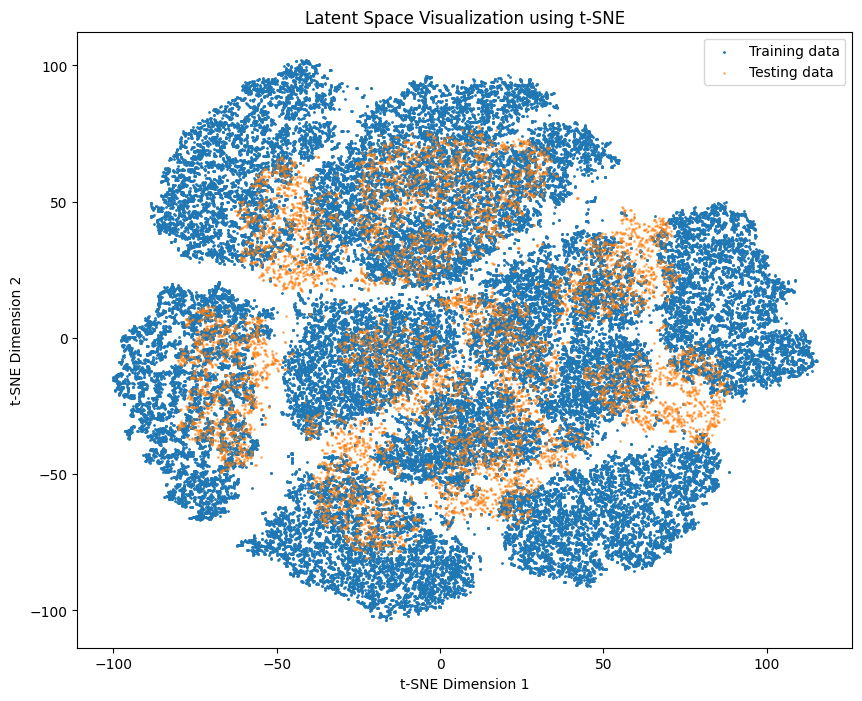

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist

# Load and preprocess the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((x_train.shape[0], 28*28))
x_test = x_test.reshape((x_test.shape[0], 28*28))

# Define the autoencoder model
input_dim = x_train.shape[1]
encoding_dim = 32  # Dimension of the latent space

# Encoder
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)

# Decoder
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Autoencoder model
autoencoder = Model(input_layer, decoded)
encoder = Model(input_layer, encoded)

# Compile and train the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train, epochs=4, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Obtain the latent space representations
latent_space_train = encoder.predict(x_train)
latent_space_test = encoder.predict(x_test)

# Dimensionality reduction using t-SNE
tsne = TSNE(n_components=2, random_state=0)

# Fit and transform training and testing data separately
latent_space_train_tsne = tsne.fit_transform(latent_space_train)
latent_space_test_tsne = tsne.fit_transform(latent_space_test)

# Plot the latent space
plt.figure(figsize=(10, 8))
plt.scatter(latent_space_train_tsne[:, 0], latent_space_train_tsne[:, 1], s=1, label='Training data')
plt.scatter(latent_space_test_tsne[:, 0], latent_space_test_tsne[:, 1], s=1, label='Testing data', alpha=0.5)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('Latent Space Visualization using t-SNE')
plt.legend()
plt.show()
